In [1]:
# We load the competition data

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


# Packages

In [2]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.6 MB/s eta 0:00:00


# Libraries

In [3]:
import numpy as np
import pandas as pd
import ydata_profiling as pp
import sweetviz as sv
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Predict Calorie Expenditure

### Playground Series - Season 5, Episode 5

### Your Goal: 

Your goal is to predict how many calories were burned during a workout.

### Evaluation:

The evaluation metric for this competition is Root Mean Squared Logarithmic Error(RMSLE).

### Submission File:

For each id row in the test set, you must predict the continuous target, Calories. The file should contain a header and have the following format:

id,Calories

750000,93.2
750001,27.42
750002,103.8
etc.

### Timeline

Start Date - May 1, 2025

Entry Deadline - Same as the Final Submission Deadline

Team Merger Deadline - Same as the Final Submission Deadline

Final Submission Deadline - May 31, 2025

All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. 

The competition organizers reserve the right to update the contest timeline if they deem it necessary.

# Initial analysis

In [4]:
# We load the data

calories_train = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv", index_col="id")

In [5]:
calories_train.shape

(750000, 8)

In [6]:
calories_train.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
id                                                                        
0     male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   female   51   161.0    64.0       7.0        84.0       39.8      29.0
3     male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [7]:
calories_train.describe().style.background_gradient(cmap='Greens')

In [8]:
calories_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


# EDA

We start by using auto EDA tools, not just to test them, but also to take a different approach to traditional data exploration. Later, if time permits, I will leave a version with a more traditional EDA approach, with some general function to explore each variable and visualize the data with Seaborn, as I have already done in other notebooks.

We will try two alternatives:

- YData Profiling
  
https://docs.profiling.ydata.ai/latest/

https://github.com/ydataai/ydata-profiling

- SweetViz

https://pypi.org/project/sweetviz/

https://github.com/fbdesignpro/sweetviz

## YData Profiling

In [9]:
# We pass the data to the profiler

profile_calories = pp.ProfileReport(calories_train, title="Calories Profiling Report")

# Get the full profile

profile_calories

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:02<00:00,  3.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## SweetViz

Uncomment the comparison line of code to compare the train and test datasets with the tool. I usually start by analyzing and processing the train data and then focus on testing, but if you want to do that first, I'll leave the line of code. Don't forget to comment the analyze function line and load the test data.

                                             |          | [  0%]   00:00 -> (? left)


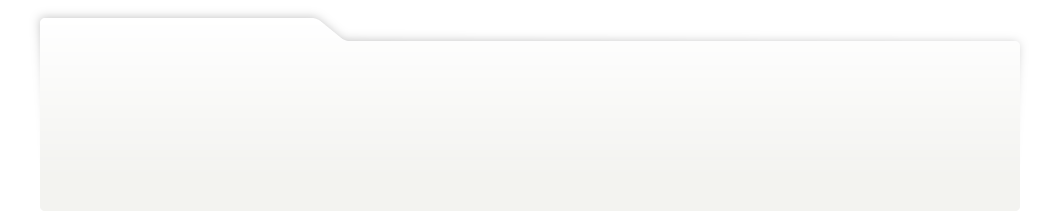
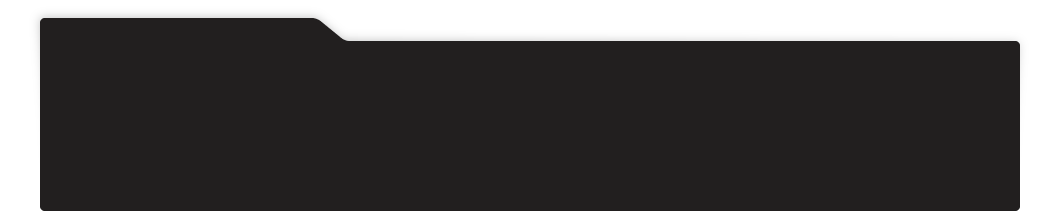
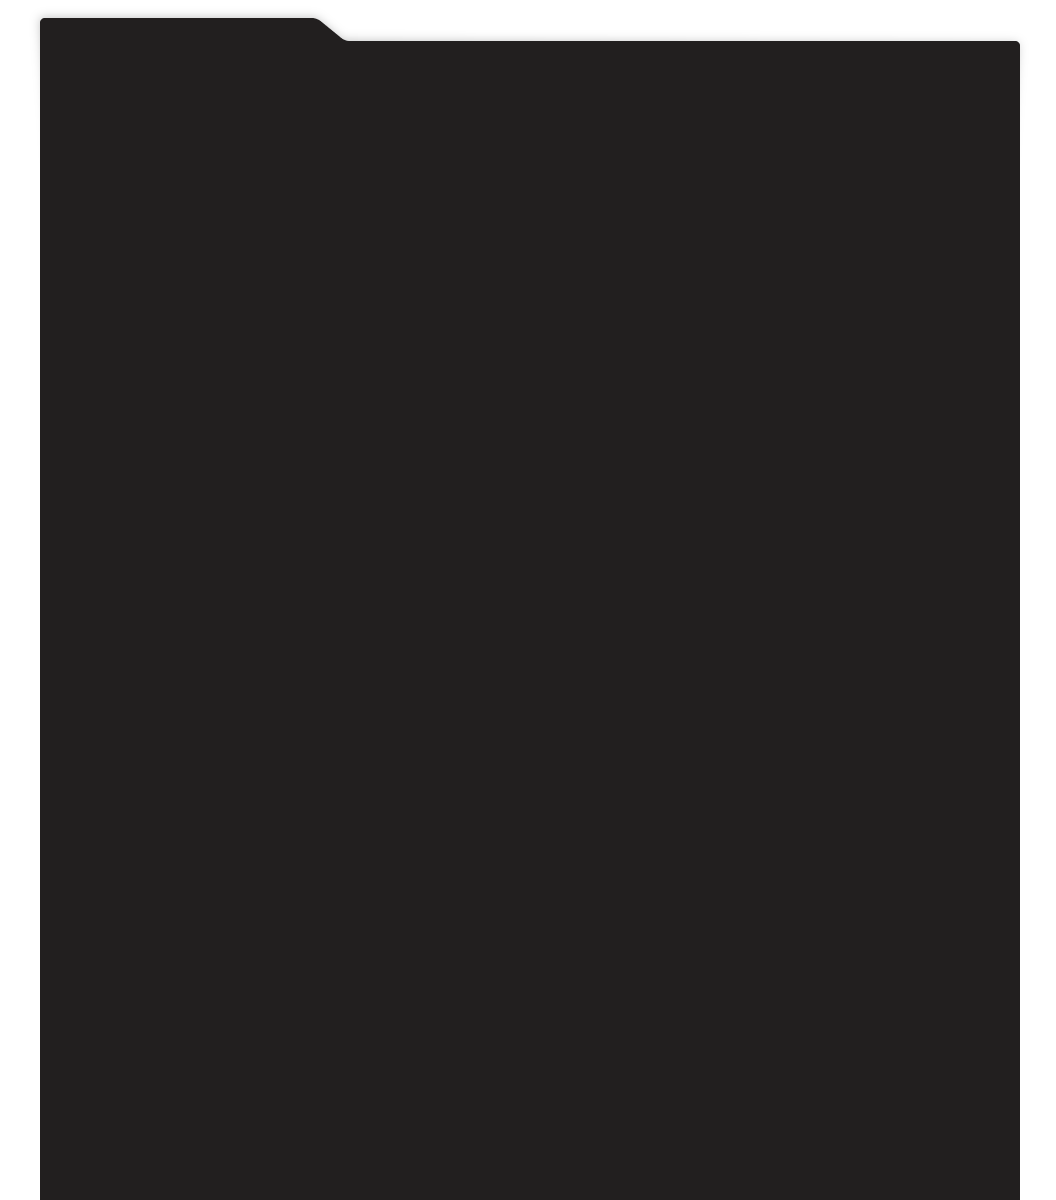
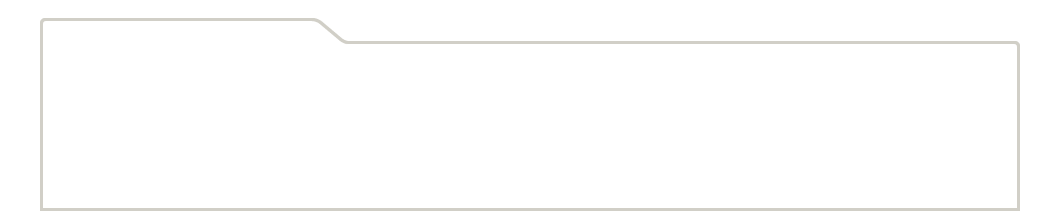
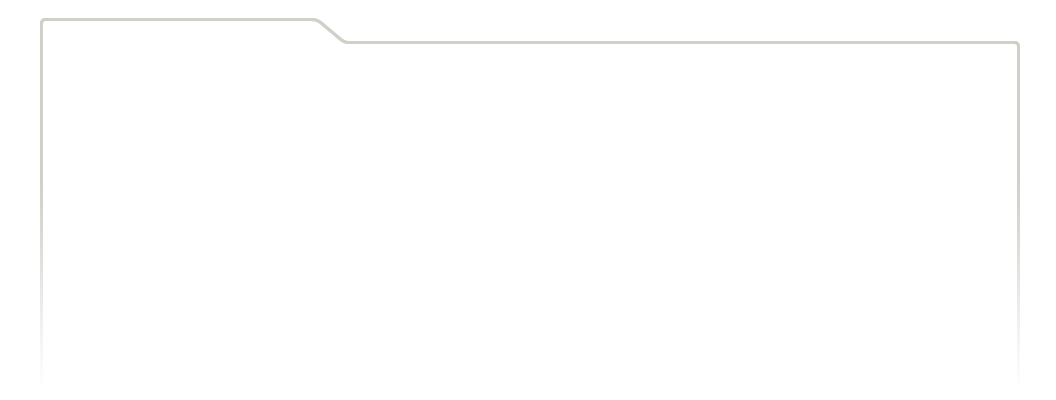
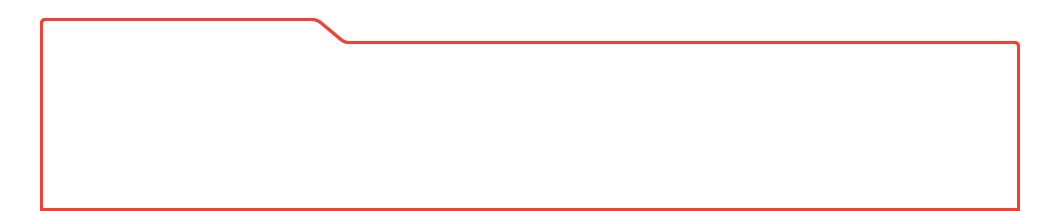
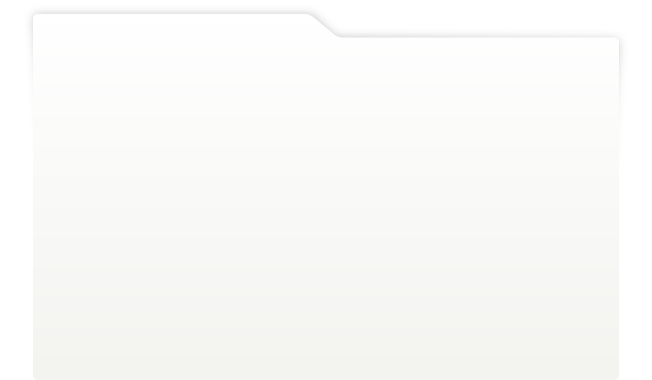
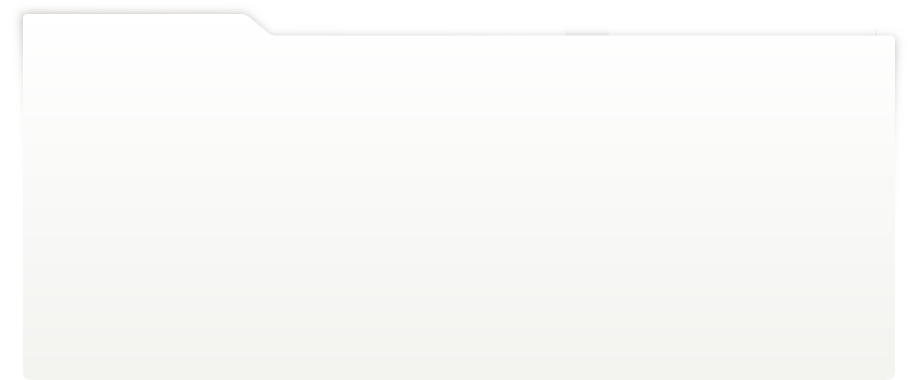
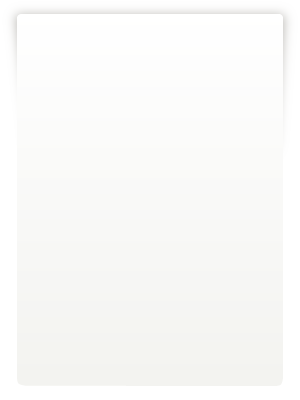
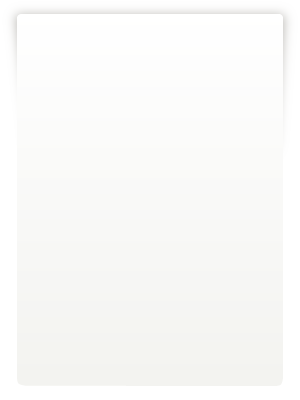
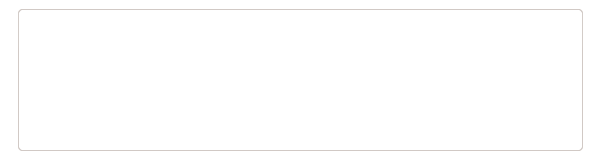
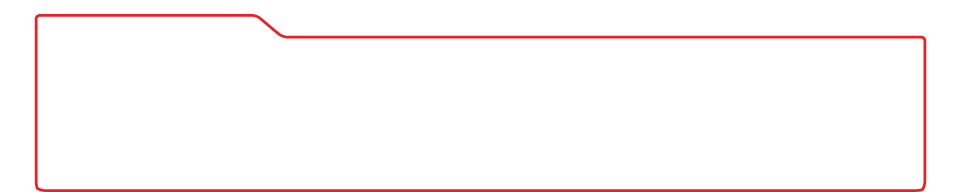
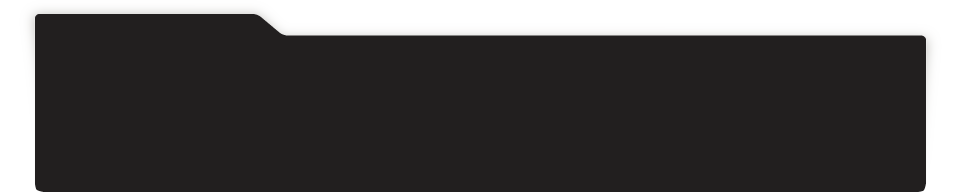
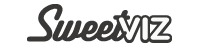
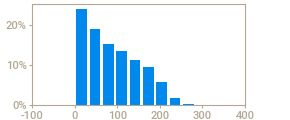
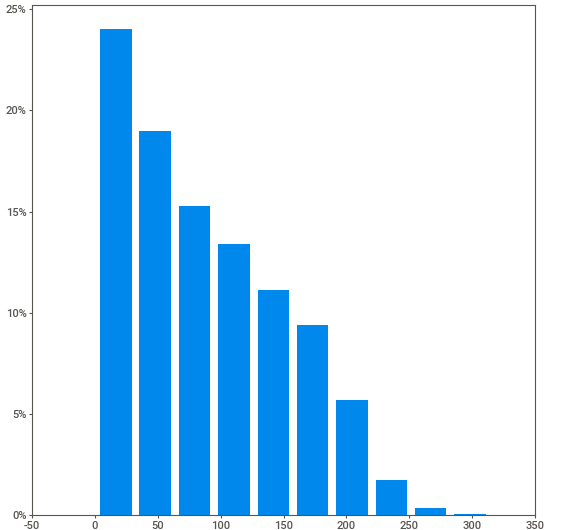
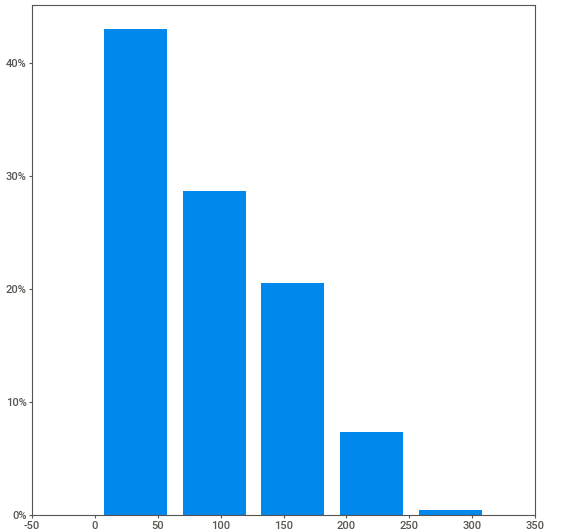
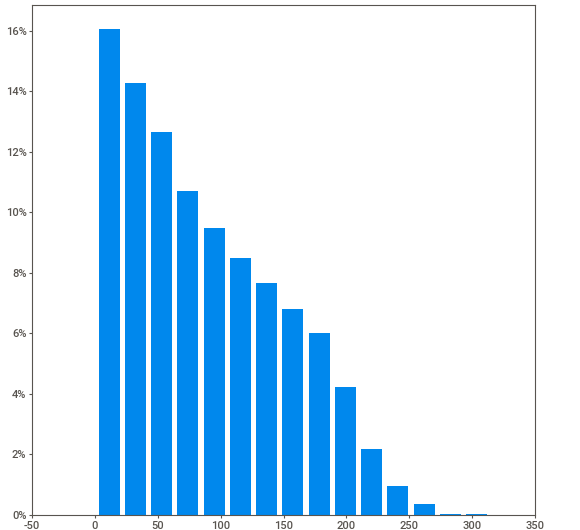
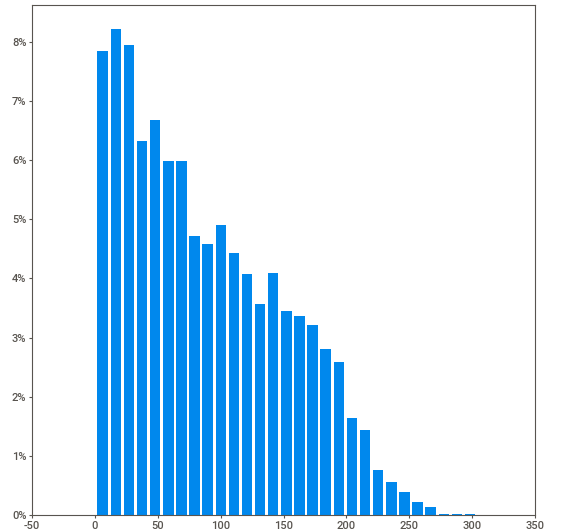
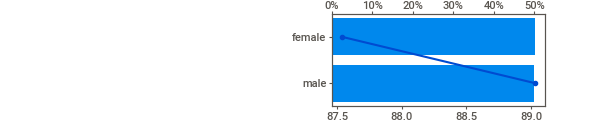
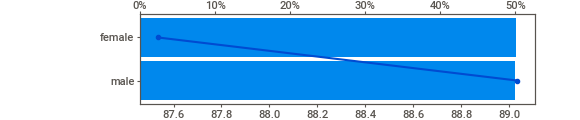
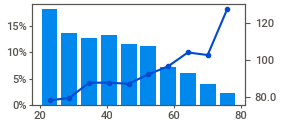
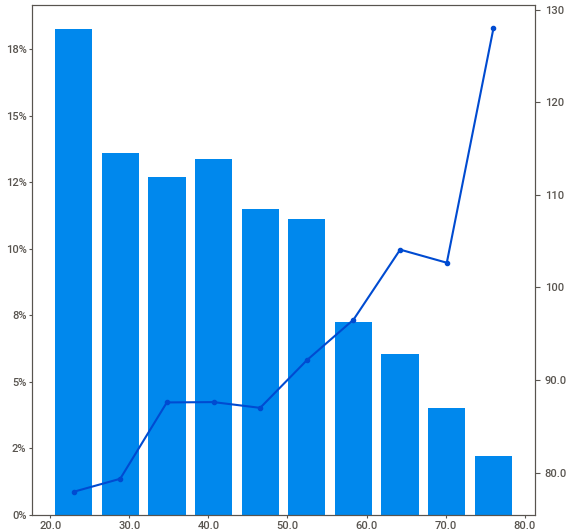
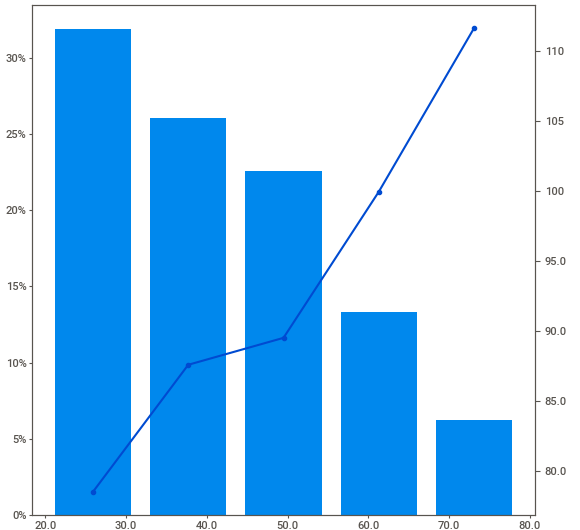
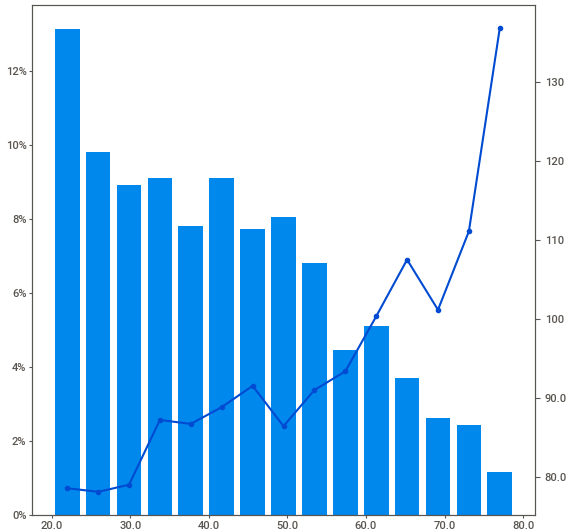
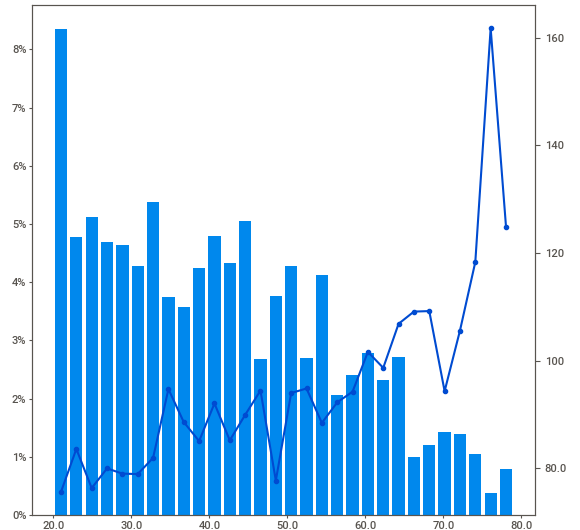
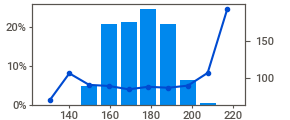
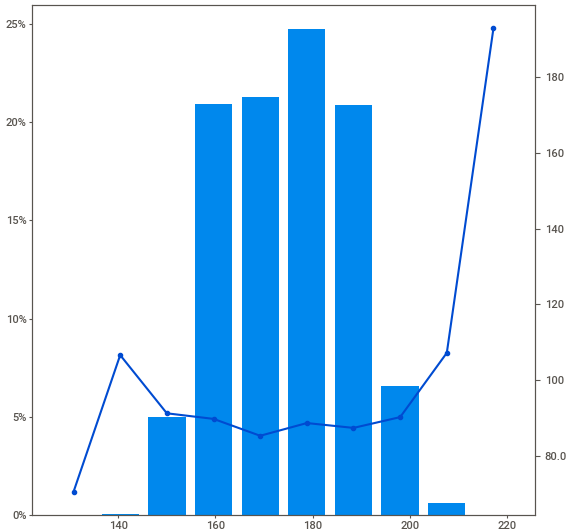
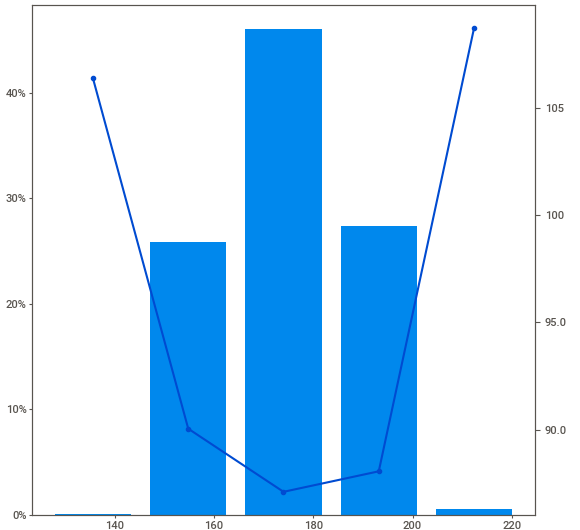
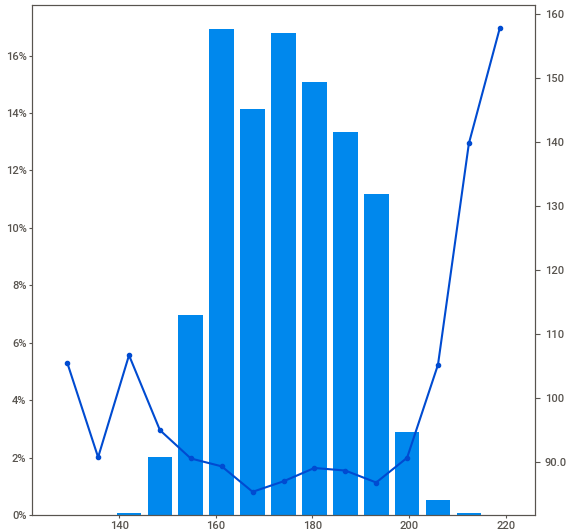
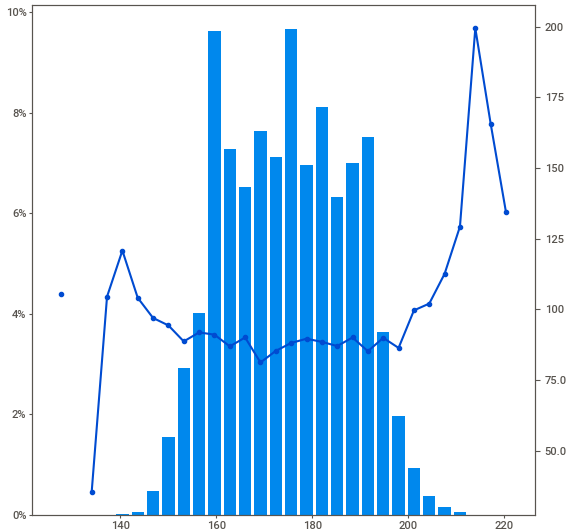
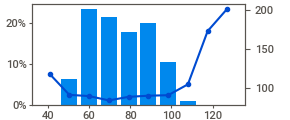
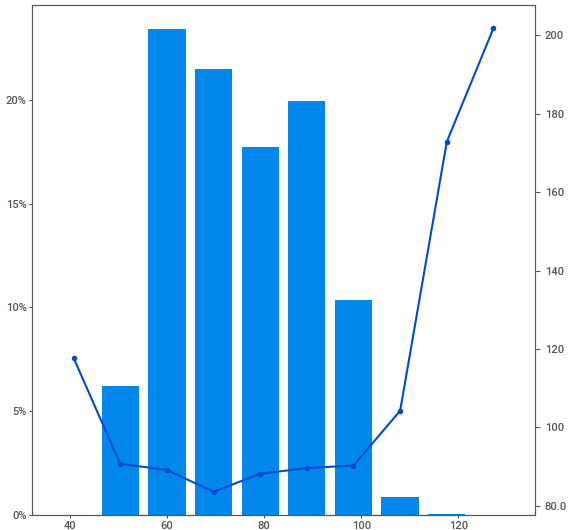
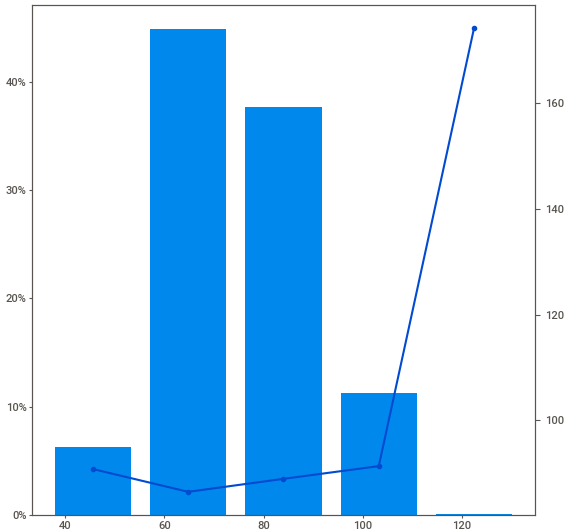
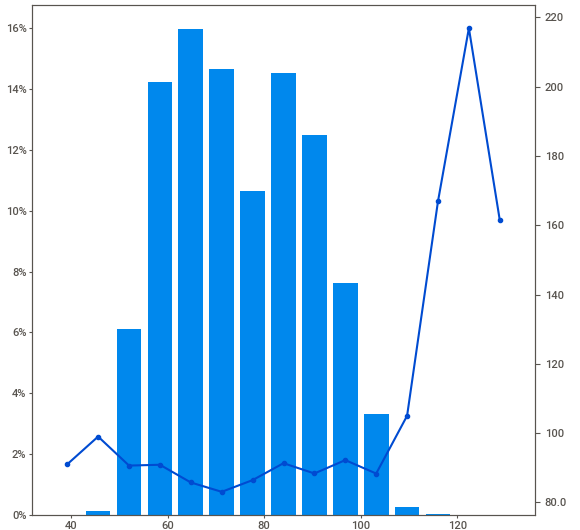
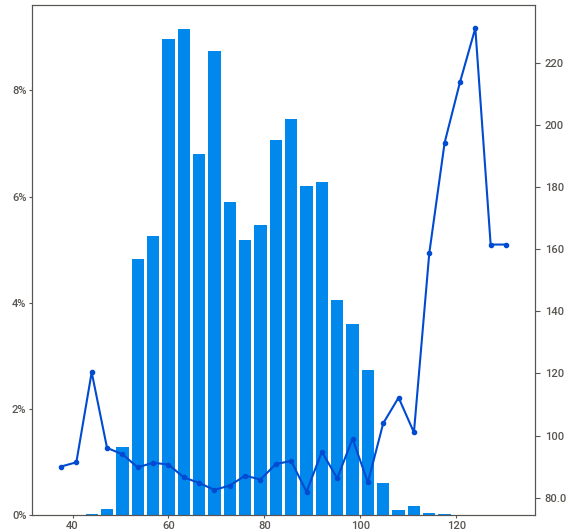
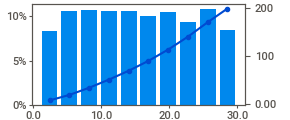
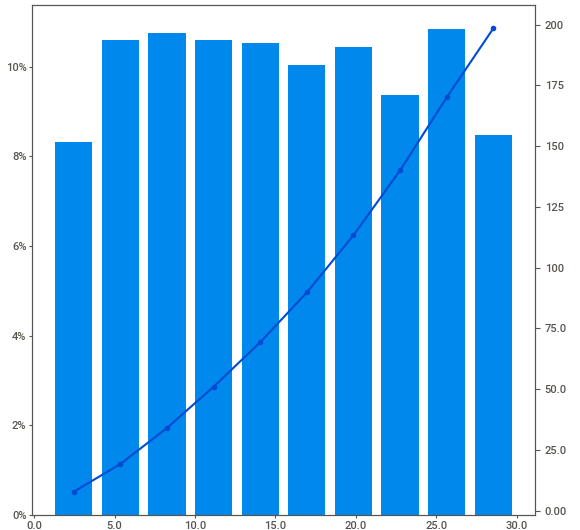
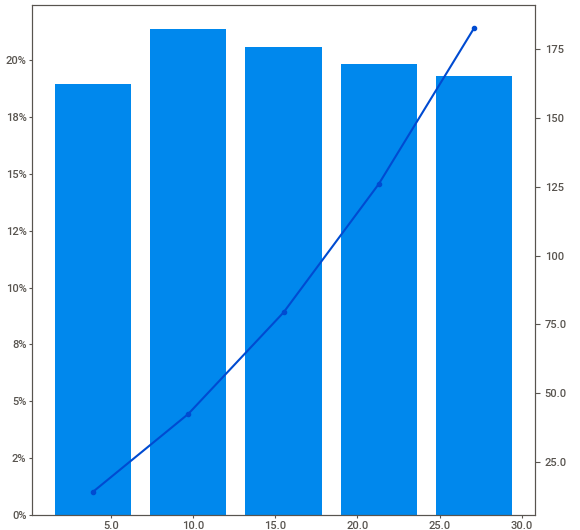
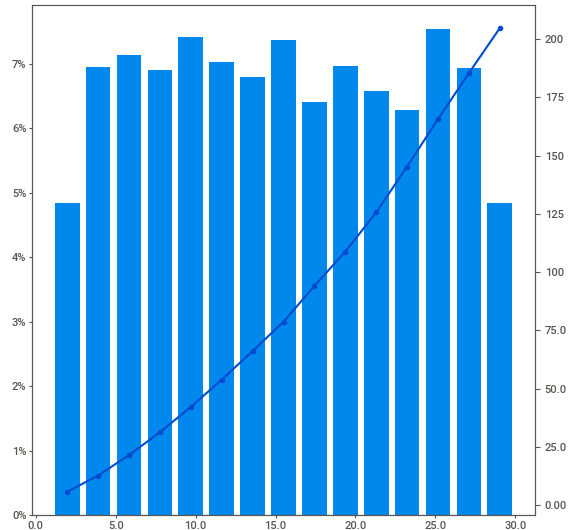
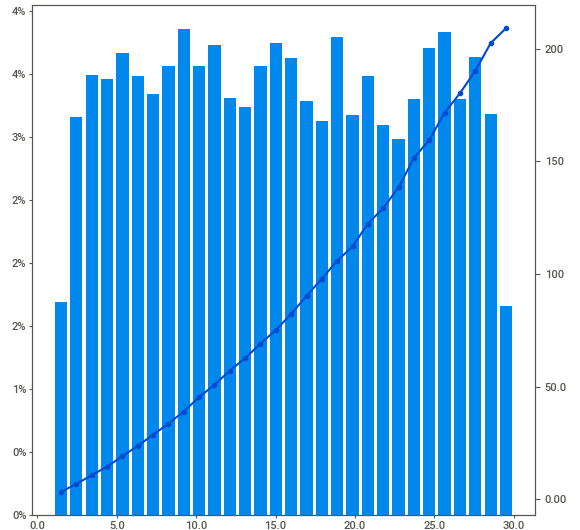
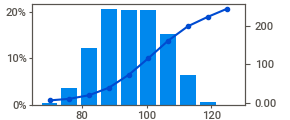
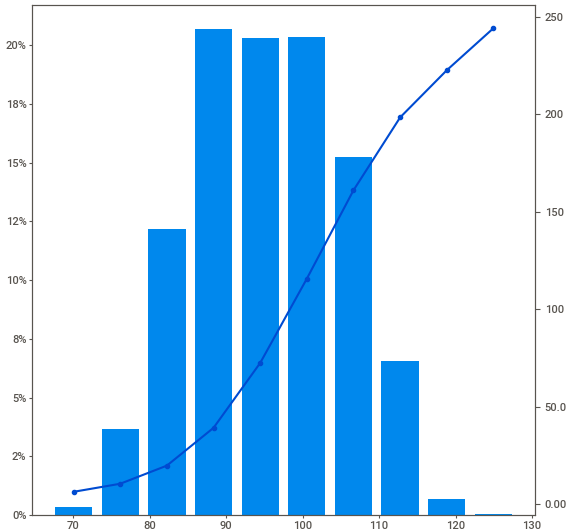
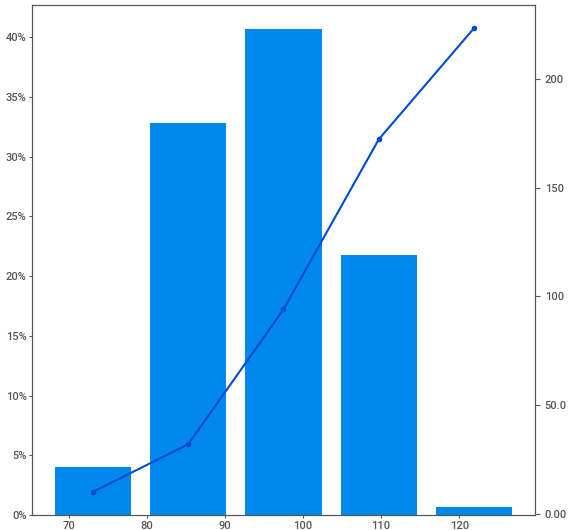
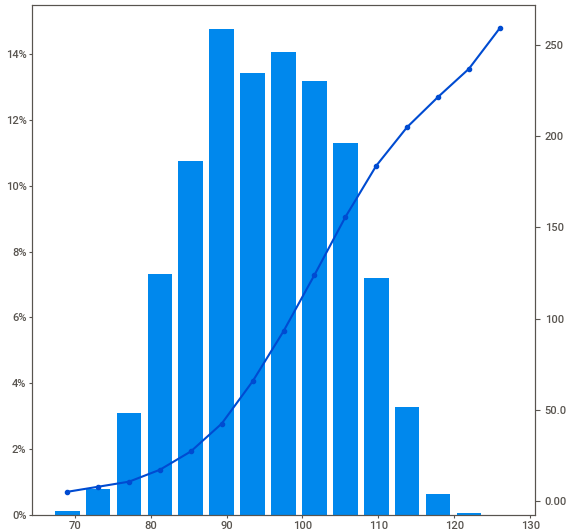
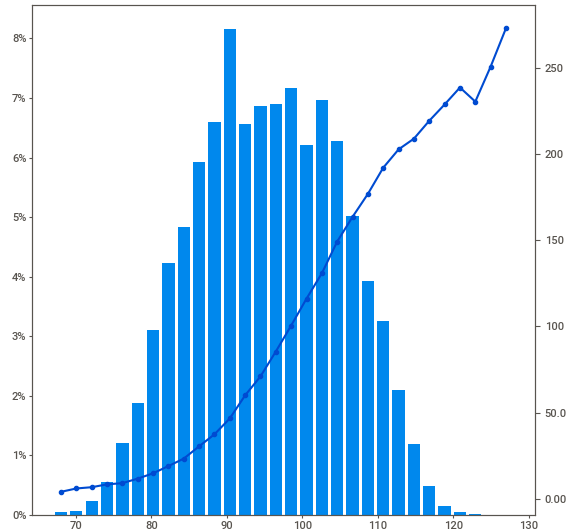
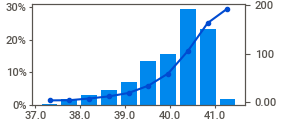
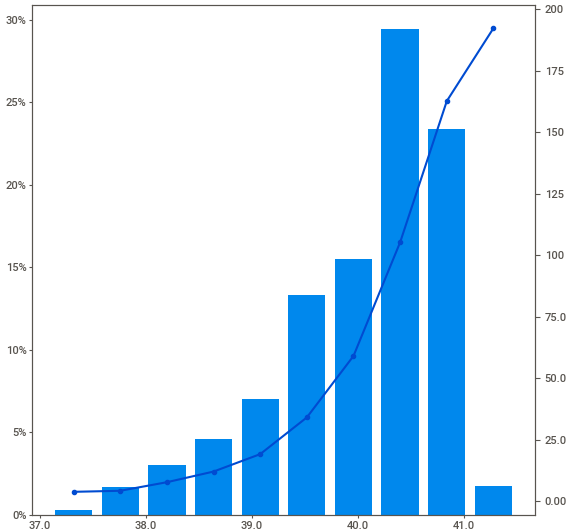
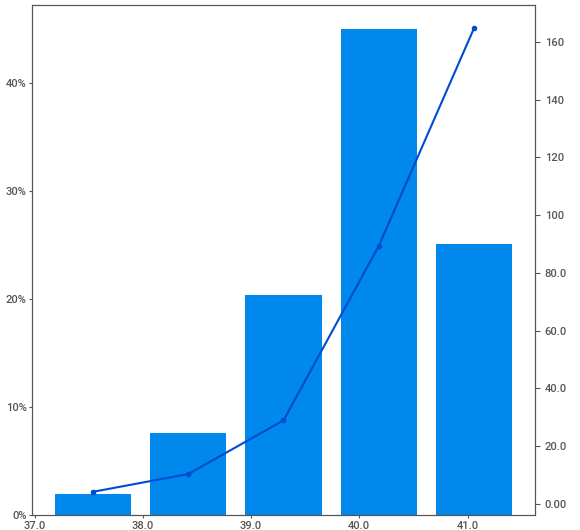
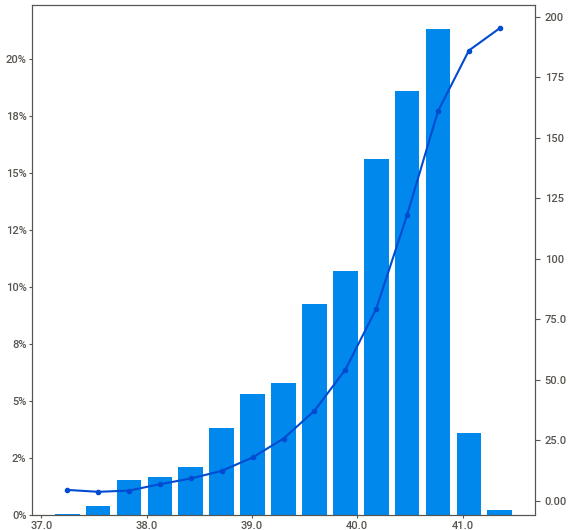
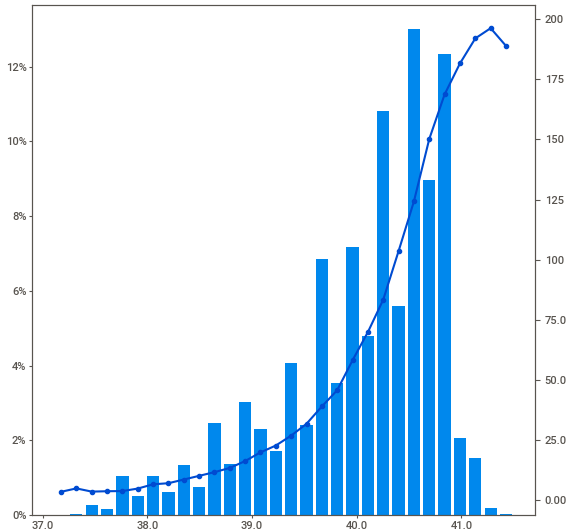
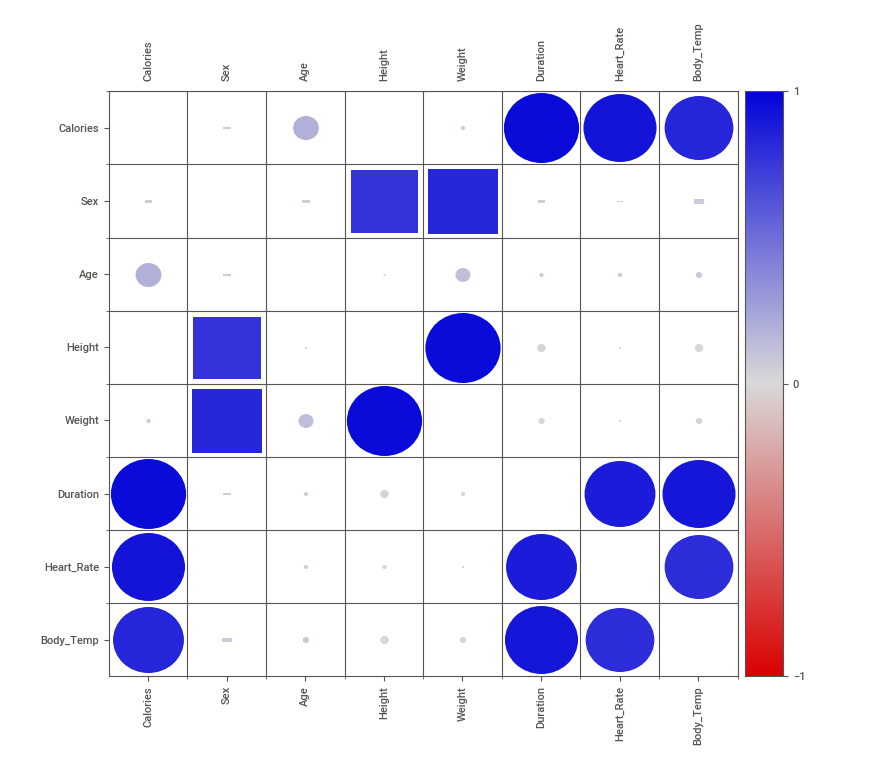
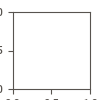

In [10]:
# We pass the data to the profiler

calories_report = sv.analyze([calories_train, "Train"], target_feat="Calories")

# We use the comparison function of the tool

#calories_compare = sv.compare(source=calories_train, compare=calories_test, target_feat="MedHouseVal")

# Get the full profile

calories_report.show_notebook(w="100%", h="full")

### Calories (Target variable)

Our target variable. Highly correlated with body temperature, heart rate, and duration. We found no null or erroneous values, with a positively skewed distribution. The average value is around 88 calories, with a range of values from 1 to 314, with the lowest values having a wider frequency.

### Sex

The only categorical variable we found in the data. We found no erroneous or missing values, and the distribution of values is almost 50/50 for each present value. The variable has a high correlation, as expected, with height and weight.

### Age

We found no null or erroneous values. The age range spans from 20 to 79 years, with a larger presence of lower values, and a skewed distribution to the right. The average age is around 40, and could be replaced by an age range variable.

### Height

No missing or erroneous values were found. The values are represented in centimeters, with an average height of 1.70 meters (the averages, minimums, and maximums by sex and age could be analyzed later). We found some potential outliers when, logically, we approached the minimum and maximum height values. We found a distribution that could be described as symmetrical, with almost the same mean and average values, and similar frequencies on the left and right. The height range is 126 to 222 centimeters, with a high correlation between height and sex.

### Weight

We found something similar with the height variable. There were no null or erroneous values, but we observed some outliers. The distribution is skewed with a small tail to the right. We took the values for this variable in kilograms, with a weight range of 36 to 132 kilos, with an average weight of 75 kg. It could also be separated into weight ranges. We found it logically correlated with sex and height.

### Duration

We will define this variable as the amount of time exercised in minutes. We found no null or erroneous values, and a possible symmetrical distribution, with a mean and average of around 15 minutes. The range of values spans from 1 to 30 minutes. We could separate it into exercise intensity categories (Low, Moderate, Intense). Logically, this is the variable most linearly correlated with calories expended.

### Heart_Rate

We find the variable heart rate, which measures the number of beats per minute. A normal heart rate at rest is between 60 and 100 beats per minute. The average heart rate during exercise depends on the intensity and type of activity. The target heart rate during moderate-intensity exercise is between 50% and 70% of the maximum heart rate, while for vigorous exercise it is 70% to 85%. We found no null or erroneous values, with a possible symmetrical distribution, with the mean and average around 95 beats per minute. The range of values is between 67 and 128 beats per minute. We could relate the variable to duration to expand the features. We found it highly correlated with duration and calories.

### Body_Temp

Average body temperature during intense exercise can temporarily rise to 40°C (104°F). The ideal temperature during exercise and competition is considered to be around 38.5°C. Normal resting body temperature ranges from 36.1°C (97°F) to 37.2°C (99°F). We found no null or erroneous values, and a left-tailed or negatively skewed distribution. The range of values is between 37 and 41 degrees Celsius, with the presence of possible outliers. We could obtain new variables from their relationship with duration, in addition to a possible separation into categories by temperature range. The variable is logically highly correlated with duration.

Next, we'll perform data cleaning where necessary, in addition to handling any duplicate values we find (representing 0.3% of the data). Later, as I mentioned previously, we'll likely expand the data analysis for each variable as we progress through our initial approach.